In [1]:
import numpy as np
import cv2
import sys 

import matplotlib.pyplot as plt
import os

In [2]:
# point processing

src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)
print(type(src))

if src is None:
    print('image read failed')
    sys.exit()
    
# 클립핑 포함한 사용법은 2가지 존재
# numpy.clip(array, min, max)
# array 내의 element들에 대해서
# min 값 보다 작은 값들을 min값으로 바꿔주고
# max 값 보다 큰 값들을 max값으로 바꿔주는 함수.
# np.clip(array, 0, 255) : array 값을 0에서 255 사이로 만들어준다.
dst = np.clip(src + 100.0, 0, 255).astype(np.uint8) # 소수점 연산 필요
dst2 = cv2.add(src, (100, 100, 100, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

<class 'numpy.ndarray'>


In [3]:
# point processing 2

src = cv2.imread('./fig/lenna.png', 1)
print(type(src))

if src is None:
    print('image read failed')
    sys.exit()
    
dst = np.clip(src + 100.0, 0, 255).astype(np.uint8) # 소수점 연산 필요
dst2 = cv2.add(src, (100, 100, 100, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

<class 'NoneType'>
image read failed


SystemExit: 

C:\Users\sangt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


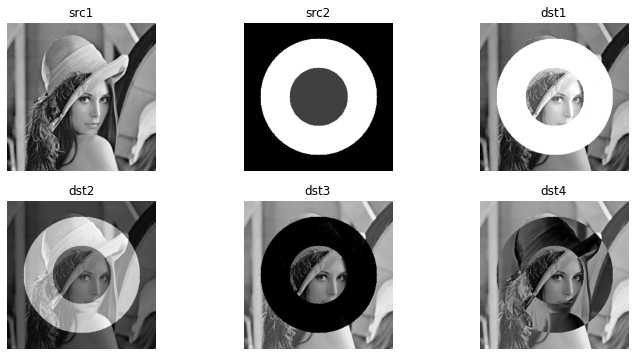

In [5]:
# point processing 2

src1 = cv2.imread('./fig/lenna256.bmp', 0) # grayscale
src2 = np.zeros((256, 256), np.uint8) # 검은 화면만 나온다.
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.figure(figsize = (12, 6))
plt.subplot(231), plt.imshow(src1, cmap = 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap = 'gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1, cmap = 'gray'), plt.axis('off'), plt.title('dst1')
plt.subplot(234), plt.imshow(dst2, cmap = 'gray'), plt.axis('off'), plt.title('dst2')
plt.subplot(235), plt.imshow(dst3, cmap = 'gray'), plt.axis('off'), plt.title('dst3')
plt.subplot(236), plt.imshow(dst4, cmap = 'gray'), plt.axis('off'), plt.title('dst4')


cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# point processing 2

src1 = cv2.imread('./fig/lenna256.bmp', 0) # grayscale
src2 = np.zeros((256, 256), np.uint8) # 검은 화면만 나온다.
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [28]:
img1 = cv2.imread('./fig/cow.png') 
img2 = cv2.imread('./fig/imgbin_hat.png') 

img2 = cv2.resize(img2,(int(img2.shape[0]/5), int(img2.shape[1]/5)))

h, w = img2.shape[:2]
img1 = cv2.resize(img1, (w, h), interpolation = cv2.INTER_AREA)

alpha = 1*0.01
for i in range(100):
    alpha += 1*0.01
    dst = cv2.addWeighted(img2, alpha, img1, 1-alpha, 0.0)
    cv2.imshow('dst', dst)

    if cv2.waitKey(50) == 27:
        break
        
    if i == 99:
        cv2.waitKey()
        

cv2.destroyAllWindows()

In [2]:
img1 = cv2.imread('./fig/cat.bmp') 
img2 = cv2.imread('./fig/imgbin_hat.png') 

h, w = img2.shape[:2]
img1 = cv2.resize(img1, (w, h), interpolation = cv2.INTER_AREA)

for i in range(100):
    alpha = 1*0.01
    dst = cv2.addWeighted(img2, alpha, img1, 1-alpha, 0.0)
    cv2.imshow('dst', dst)

    if cv2.waitKey(50) == 27:
        break
        
    if i == 99:
        cv2.waitKey()
        

cv2.destroyAllWindows()

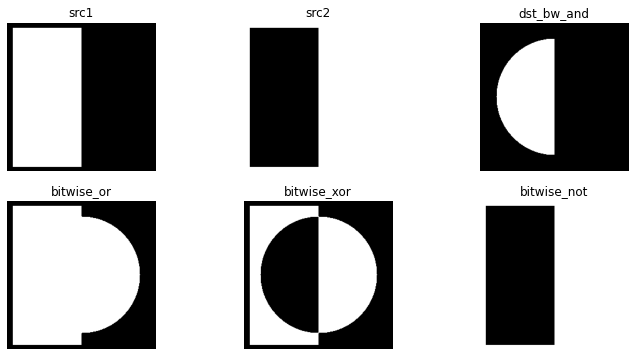

In [6]:
# bitwise operation
src1 = np.zeros((256, 256), np.uint8)
cv2.rectangle(src1, (10, 10), (127, 248), 255, -1)

src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)

dst_bw_and = cv2.bitwise_and(src1, src2)
dst_bw_or = cv2.bitwise_or(src1, src2)
dst_bw_xor = cv2.bitwise_xor(src1, src2)
dst_bw_not = cv2.bitwise_not(src1, src2)


plt.figure(figsize = (12, 6))
plt.subplot(231), plt.imshow(src1, 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, 'gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst_bw_and, 'gray'), plt.axis('off'), plt.title('dst_bw_and')
plt.subplot(234), plt.imshow(dst_bw_or, 'gray'), plt.axis('off'), plt.title('bitwise_or')
plt.subplot(235), plt.imshow(dst_bw_xor, 'gray'), plt.axis('off'), plt.title('bitwise_xor')
plt.subplot(236), plt.imshow(dst_bw_not, 'gray'), plt.axis('off'), plt.title('bitwise_not')


cv2.waitKey()
cv2.destroyAllWindows()

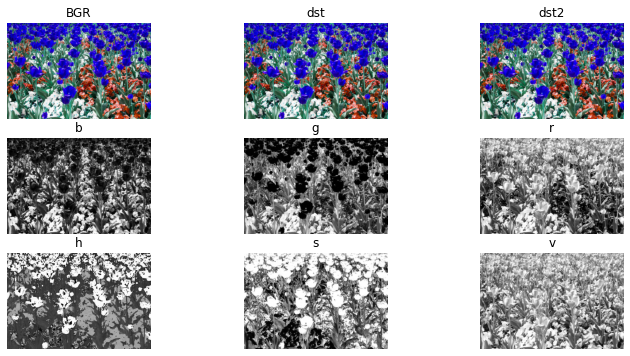

In [19]:
src = cv2.imread('./fig/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

b, g, r = cv2.split(src)

h, s, v = cv2.split(src_hsv)
dst = cv2.merge((h, s, v))
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

hh = src_hsv[:, :, 0]
ss = src_hsv[:, :, 1]
vv = src_hsv[:, :, 2]
dst2 = cv2.merge((hh, ss, vv))
dst2 = cv2.cvtColor(dst2, cv2.COLOR_HSV2BGR)


plt.figure(figsize = (12, 6))
plt.subplot(331), plt.imshow(src, 'gray'), plt.axis('off'), plt.title('BGR')
plt.subplot(332), plt.imshow(dst, 'gray'), plt.axis('off'), plt.title('dst')
plt.subplot(333), plt.imshow(dst2, 'gray'), plt.axis('off'), plt.title('dst2')
plt.subplot(334), plt.imshow(b, 'gray'), plt.axis('off'), plt.title('b')
plt.subplot(335), plt.imshow(g, 'gray'), plt.axis('off'), plt.title('g')
plt.subplot(336), plt.imshow(r, 'gray'), plt.axis('off'), plt.title('r')
plt.subplot(337), plt.imshow(h, 'gray'), plt.axis('off'), plt.title('h')
plt.subplot(338), plt.imshow(s, 'gray'), plt.axis('off'), plt.title('s')
plt.subplot(339), plt.imshow(v, 'gray'), plt.axis('off'), plt.title('v')





cv2.waitKey()
cv2.destroyAllWindows()